## Introduction

The analyse funding received by start-ups in India from 2018 to 2021 and propose the best course of action

## Hypothesis

- H0: The amount of funding received is influenced by company location and industry.<br>
- H1: The amount of funding received is not influenced by company location and industry.

## Questions

- Which Sector accessed most funds?
- Which Sector received the lowest funds?
- Who are the top 10 investors by number of startups funded?
- Which Startups are most favored by investors?
- Is there a trend in the total amount invested in startups over the years?
- Which Sector has the maximum number of startups?
- Does startups in developed cities receive higher amount of funding?

In [117]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [26]:
#load our dataset

df_2018 = pd.read_csv("D:/Work/Mine/Data Science/Projects/Data Science/Data Analysis/Indian Startup Fund Analysis/Data/startup_funding2018.csv")
df_2019 = pd.read_csv("D:/Work/Mine/Data Science/Projects/Data Science/Data Analysis/Indian Startup Fund Analysis/Data/startup_funding2019.csv")
df_2020 = pd.read_csv("D:/Work/Mine/Data Science/Projects/Data Science/Data Analysis/Indian Startup Fund Analysis/Data/startup_funding2020.csv")
df_2021 = pd.read_csv("D:/Work/Mine/Data Science/Projects/Data Science/Data Analysis/Indian Startup Fund Analysis/Data/startup_funding2021.csv")

### Deep dive on 2018 data

In [27]:
df_2018.head(50)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


In [28]:
# Check for number of rows and columns
df_2018.shape

(526, 6)

In [29]:
# Get information on all columns in the dataset
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


### Deep dive on 2019 data

In [30]:
df_2019.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
88,Ess Kay Fincorp,NaN,Rajasthan,Banking,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India","$33,000,000",NaN


In [31]:
# # Check for number of rows and columns
df_2019.shape

(89, 9)

In [32]:
# Get information on all columns in the dataset
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


### Deep dive on 2020 data

In [33]:
df_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [34]:
# Check for number of rows and columns
df_2020.shape

(1055, 10)

In [35]:
# Get information on all columns in the dataset
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [36]:
# deep dive into Unnamed column
df_2020["Unnamed: 9"].value_counts()

Seed Round    1
Pre-Seed      1
Name: Unnamed: 9, dtype: int64

In [37]:
# Locate column that contains Pre-Seed and Seed Round
Unnamed_df = df_2020.loc[df_2020["Unnamed: 9"].isin(["Pre-Seed", "Seed Round"])]
Unnamed_df

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
611,Walrus,2019,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,Undisclosed,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...","$1,700,000",Seed Round,Seed Round


### Deep dive on 2021 data

In [38]:
df_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [39]:
# Check for rows and columns
df_2021.shape

(1209, 9)

In [40]:
# Get information on all columns in the dataset
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


## Observations

- 2018 data has 6 columns whilst 2019 and 2021 have 10 columns and 2020 with 9 columns
- Unnamed column in 2020 data is useless hence should be dropped.
- The amounts in the 2018 DataFrame are a mix of Indian Rupees INR and USD. We must convert them to dollars.
- The industry and location columns have multiple information. For uniformity with other datasets, it should be downsized.
- Some amounts are undisclosed and others have no currency symbol attached to it.

### Process 2018 dataset

In [41]:
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


### Lets start with Industry Column....

In [42]:
with pd.option_context('display.max_rows', None,):
    print(df_2018)

                                          Company Name  \
0                                      TheCollegeFever   
1                                      Happy Cow Dairy   
2                                           MyLoanCare   
3                                          PayMe India   
4                                             Eunimart   
5                                               Hasura   
6                                            Tripshelf   
7                                         Hyperdata.IO   
8                                         Freightwalla   
9                                   Microchip Payments   
10                          BizCrum Infotech Pvt. Ltd.   
11                                             Emojifi   
12                                               Flock   
13                                           Freshboxx   
14                          Wide Mobility Mechatronics   
15                                             Pitstop   
16            

In [43]:
df_2018.loc[251:251]

,Company Name,Industry,Round/Series,Amount,Location,About Company
251,Inner Being Wellness,—,Angel,"₹35,000,000","Hyderabad, Andhra Pradesh, India","Inner Being Wellness manufactures beauty, well..."


In [44]:
# Check for missing values
df_2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [45]:
# Split and use first words in Industry column
df_2018['Industry'] = df_2018['Industry'].apply(str)
df_2018['Industry'] = df_2018['Industry'].str.split(',').str[0]
df_2018['Industry'] = df_2018['Industry'].replace("'", "", regex=True)
df_2018['Industry'] = df_2018['Industry'].replace("—", np.nan, regex=True)

In [46]:
# Check for missing values after cleaning
df_2018.isna().sum()

Company Name      0
Industry         30
Round/Series      0
Amount            0
Location          0
About Company     0
dtype: int64

In [47]:
# Check data after cleaning
df_2018["Industry"].head(10)

0         Brand Marketing
1             Agriculture
2                  Credit
3      Financial Services
4    E-Commerce Platforms
5    Cloud Infrastructure
6                Internet
7         Market Research
8    Information Services
9         Mobile Payments
Name: Industry, dtype: object

### Location Column...

In [48]:
# Split and use first city under Location column
df_2018['Location'] = df_2018['Location'].apply(str)
df_2018['Location'] = df_2018['Location'].str.split(',').str[0]

In [49]:
df_2018['Location'].head()

0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
Name: Location, dtype: object

### Amount Column....

In [50]:
df_2018["Amount"].value_counts().head(50)

—                 148
1000000            24
500000             13
2000000            12
₹50,000,000         9
₹20,000,000         8
5000000             7
4000000             7
₹40,000,000         6
250000              6
₹35,000,000         5
300000              4
$100,000            4
3000000             4
₹30,000,000         4
1500000             4
1100000             4
$11,000,000         3
400000              3
30000000            3
150000              3
120000              3
1300000             3
$1,000,000          3
₹140,000,000        3
$2,000,000          3
₹5,000,000          3
₹100,000,000        3
₹600,000,000        3
₹2,000,000,000      3
$100,000,000        3
$1,500,000          3
₹10,000,000         3
₹250,000,000        3
₹70,000,000         3
200000              3
$10,000,000         2
₹60,000,000         2
₹12,000,000         2
₹135,000,000        2
$3,000,000          2
50000               2
₹2,500,000,000      2
$6,000,000          2
50000000            2
₹12,500,00

In [51]:
# Create a separate dataframe for amounts in rupees
df_2018_Rupees = df_2018[df_2018['Amount'].str.contains('₹')]

df_2018_Rupees["Amount"] = df_2018_Rupees["Amount"].apply(lambda x: x.replace('₹', '').replace(',', '')).astype('float')
df_2018_Rupees["Amount"] = df_2018_Rupees["Amount"] * 0.0146

df_2018_Rupees.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India
6,Tripshelf,Internet,Seed,233600.0,Kalkaji,Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,730000.0,Hyderabad,Hyperdata combines advanced machine learning w...
15,Pitstop,Automotive,Seed,1460000.0,Bengaluru,Pitstop offers general repair and maintenance ...


In [52]:
# Remove dollar sign amounts and replace - with 0.
df_2018["Amount"] = df_2018["Amount"].apply(lambda x: x.replace('$', '').replace(',', '').replace('—', '0'))

In [53]:
# Subset data rows that do not contain rupee symbol
df_2018 = df_2018[~df_2018['Amount'].str.contains('₹', na=False)]

In [54]:
# Join clean data together
df_2018 = pd.concat([df_2018, df_2018_Rupees], ignore_index = True)

#Convert amount data type to float
df_2018["Amount"].astype("float")

0        250000.0
1       2000000.0
2             0.0
3       1600000.0
4             0.0
          ...    
521    16498000.0
522    11826000.0
523    20440000.0
524      146000.0
525      511000.0
Name: Amount, Length: 526, dtype: float64

In [55]:
# Create a new column and label it 2018.
df_2018["Funding Year"] = "2018"
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Funding Year
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018
2,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
3,Hasura,Cloud Infrastructure,Seed,1600000,Bengaluru,Hasura is a platform that allows developers to...,2018
4,Freightwalla,Information Services,Seed,0,Mumbai,Freightwalla is an international forwarder tha...,2018


In [56]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       496 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Funding Year   526 non-null    object
dtypes: object(7)
memory usage: 28.9+ KB


### Process 2019 dataset

In [57]:
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [58]:
with pd.option_context('display.max_rows', None,):
    print(df_2019)

                   Company/Brand  Founded    HeadQuarter  \
0                 Bombay Shaving      NaN            NaN   
1                      Ruangguru   2014.0         Mumbai   
2                       Eduisfun      NaN         Mumbai   
3                       HomeLane   2014.0        Chennai   
4                       Nu Genes   2004.0      Telangana   
5                       FlytBase      NaN           Pune   
6                          Finly      NaN      Bangalore   
7                       Kratikal   2013.0          Noida   
8                      Quantiphi      NaN            NaN   
9                       Lenskart   2010.0          Delhi   
10                    Cub McPaws   2010.0         Mumbai   
11                      Appnomic      NaN      Bangalore   
12                    Kaleidofin   2018.0        Chennai   
13                     JobSquare   2019.0      Ahmedabad   
14                   Open Secret      NaN            NaN   
15                        LivFin   2017.

In [59]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


### Amount Column...

In [60]:
df_2019["Amount($)"].value_counts()

Undisclosed     12
$5,000,000       6
$6,000,000       4
$1,000,000       4
$1,500,000       4
$4,000,000       3
$30,000,000      3
$20,000,000      3
$50,000,000      3
$5,500,000       3
$12,000,000      2
$2,000,000       2
$26,000,000      2
$100,000         2
$15,000,000      1
$540,000,000     1
$275,000,000     1
$400,000         1
$140,500         1
$6,800,000       1
$22,000,000      1
$100,000,000     1
$2,100,000       1
$150,000,000     1
$2,500,000       1
$4,800,000       1
$7,000,000       1
$182,700         1
$36,000,000      1
$25,000,000      1
$15,500,000      1
$8,000,000       1
$28,000,000      1
$5,700,000       1
$311,000,000     1
$70,000,000      1
$693,000,000     1
$600,000         1
$32,000,000      1
$11,000,000      1
$6,300,000       1
$2,800,000       1
$220,000         1
$60,000,000      1
$140,000         1
$230,000,000     1
$49,400,000      1
$33,000,000      1
$150,000         1
$120,000,000     1
Name: Amount($), dtype: int64

In [61]:
# Removing the commas and dashes from the Amounts
df_2019["Amount($)"] = df_2019["Amount($)"].apply(str)
df_2019["Amount($)"].replace(",", "", inplace = True, regex=True)
df_2019["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
df_2019["Amount($)"] = df_2019["Amount($)"].apply(lambda x: float(str(x).replace("$","")))
df_2019["Founded"].replace("nan", np.nan, inplace = True, regex=True)

# Appending years of funding to the respective dataframes
df_2019["Funding Year"] = "2019"

In [62]:
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


### Process 2020 dataset

In [63]:
df_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [64]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [65]:
# we have to drop the last column
df_2020 = df_2020.drop("Unnamed: 9", axis = 1)
df_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN


In [66]:
df_2020["HeadQuarter"].value_counts().head(50)

Bangalore                                             317
Mumbai                                                165
Gurugram                                               79
Delhi                                                  62
Chennai                                                43
New Delhi                                              36
Pune                                                   36
Noida                                                  32
Hyderabad                                              25
Gurgaon                                                21
Ahmedabad                                              11
Kolkata                                                11
Haryana                                                10
Indore                                                  8
Jaipur                                                  6
Kochi                                                   5
California                                              5
Gujarat       

In [67]:
df_2020["Sector"].value_counts().head(50)

Fintech              80
Edtech               67
FinTech              51
EdTech               40
E-commerce           33
Healthtech           28
SaaS                 24
Ecommerce            22
AgriTech             19
Media                19
Tech                 19
Agritech             19
AI                   18
Logistics            16
Gaming               16
SaaS startup         15
Tech Startup         14
HealthTech           14
Entertainment        12
AI startup           12
Foodtech             12
Food                 12
Tech company         10
Healthcare            9
IoT                   8
Automobile            7
Cosmetics             7
Fashion               7
Real Estate           6
Retail                6
Finance               6
Food Industry         5
Logitech              5
Gaming startup        5
Food & Bevarages      5
Medtech               5
Beverage              5
Marketplace           5
HealthCare            5
Transport             5
HR tech               5
Hospitality     

In [68]:
with pd.option_context('display.max_rows', None,):
    print(df_2020)

                              Company/Brand Founded  \
0                                Aqgromalin    2019   
1                                  Krayonnz    2019   
2                              PadCare Labs    2018   
3                                     NCOME    2020   
4                                Gramophone    2016   
5                                    qZense    2019   
6                              MyClassboard    2008   
7                                     Metvy    2018   
8                                    Rupeek    2015   
9                                 Gig India    2017   
10                              Slurrp Farm    2016   
11                                   Medfin    2017   
12                                  MasterG    2015   
13                                 Brila 91    2014   
14                               FoodyBuddy    2015   
15                                   Zomato    2008   
16                                OurEye.ai    2020   
17        

### Headquaters...

In [69]:
# Selecting the first value as Headquarters
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].apply(str)
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].str.split(',').str[0]
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].replace("'", "", regex=True)

### Amount...

In [70]:


df_2020["Amount($)"] = df_2020["Amount($)"].apply(str)
df_2020["Amount($)"].replace(",", "", inplace = True, regex=True)
df_2020["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
df_2020["Amount($)"].replace("Undiclsosed", np.nan, inplace = True, regex=True)
df_2020["Amount($)"].replace("Undislosed", np.nan, inplace = True, regex=True)
df_2020["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)


# Removing the $ signs 
df_2020["Amount($)"] = df_2020["Amount($)"].apply(lambda x:(str(x).replace("$","")))

# Create funding year column
df_2020["Funding Year"] = "2020"

In [71]:
# Replace values with average
df_2020["Amount($)"].replace("887000 23000000", "11943500.0", inplace = True, regex=True)
df_2020["Amount($)"].replace("800000000 to 850000000", "825000000.0", inplace = True, regex=True)

In [72]:
df_2020["Amount($)"].loc[465:472]

465     11943500.0
466         764000
467         603000
468         409000
469         292000
470         286000
471         136000
472    825000000.0
Name: Amount($), dtype: object

In [73]:
# Convert Amount data tyoe to float
df_2020["Amount($)"].astype("float")

0         200000.0
1         100000.0
2              NaN
3         400000.0
4         340000.0
           ...    
1050     1500000.0
1051    13200000.0
1052     8000000.0
1053     8043000.0
1054     9000000.0
Name: Amount($), Length: 1055, dtype: float64

In [74]:
df_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,nan,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,NaN,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,NaN,2020


### Preprocess 2021 dataset

In [75]:
df_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [76]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [77]:
with pd.option_context('display.max_rows', None,):
    print(df_2021)

                        Company/Brand  Founded  \
0                      Unbox Robotics   2019.0   
1                              upGrad   2015.0   
2                         Lead School   2012.0   
3                             Bizongo   2015.0   
4                            FypMoney   2021.0   
5                       Urban Company   2014.0   
6                      Comofi Medtech   2018.0   
7                         Qube Health   2016.0   
8                            Vitra.ai   2020.0   
9                              Taikee   2010.0   
10                          Fitterfly   2016.0   
11                          FreeStand   2017.0   
12                       MyDentalPlan   2014.0   
13                       Freyr Energy   2014.0   
14                          DealShare   2018.0   
15                           Tessolve   1993.0   
16                       Smart Joules   2014.0   
17                               ORAI   2020.0   
18                            ixamBee   2016.0   


#### Value in Amount column is interchanged with that of stage.

In [78]:
df_2021.loc[df_2021["Amount($)"] == "ah! Ventures"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000


In [79]:
df_2021.loc[df_2021["Company/Brand"] == "Little Leap", ["Amount($)", "Stage", "Investor"]] = ["$300000", np.nan, "ah! Ventures"]
df_2021.loc[df_2021["Investor"] == "ah! Ventures"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
356,OwO,2020.0,Gurugram,E-commerce,"Shop packaged drinking water, beverages from y...",Hardev Sahu,ah! Ventures,"$200,000",NaN
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,ah! Ventures,$300000,NaN
840,Klassroom,2016.0,Mumbai,EdTech,Klassroom offers a one-of-a-kind LIVE interact...,Alka Javeri,ah! Ventures,"$200,000",Pre-series A
1133,Enercomp,2013.0,Ahmedabad,Information Technology & Services,Enercomp Solutions Pvt Ltd provide drone based...,SURESH SHAHDADPURI,ah! Ventures,$200000,NaN


#### There is discrepancy in Investor, Amount and Stage column.

In [80]:
df_2021.loc[df_2021["Amount($)"] == "Pre-series A"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,NaN


In [81]:
df_2021.loc[df_2021["Company/Brand"] == "AdmitKard", ["Amount($)", "Stage", "Investor"]] = ["$1000000", "Pre-series A", np.nan]
df_2021.loc[df_2021["Company/Brand"] == "AdmitKard"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,$1000000,Pre-series A


#### There is discrepancy in Amount and Stage column

In [82]:
df_2021.loc[df_2021["Amount($)"] == "ITO Angel Network LetsVenture"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [97]:
df_2021.loc[df_2021["Amount($)"] == "ITO Angel Network LetsVenture", ["Amount($)", "Stage"]] = ["$300000", np.nan]
df_2021.loc[df_2021["Company/Brand"] == "BHyve"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,NaN,2021


#### Again, Amount value is interchanged with that of Stage.

In [84]:
df_2021.loc[df_2021["Amount($)"] == "JITO Angel Network LetsVenture"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [98]:
df_2021.loc[df_2021["Amount($)"] == "JITO Angel Network LetsVenture", ["Amount($)", "Stage"]] = ["$1000000", np.nan]
df_2021.loc[df_2021["Company/Brand"] == "Saarthi Pedagogy"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,NaN,2021


In [99]:
df_2021.loc[df_2021["Amount($)"] == "Seed"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year


In [87]:
df_2021.loc[df_2021["Company/Brand"] == "MoEVing", ["Amount($)", "Stage", "Investor"]] = [5000000, "Seed", np.nan]
df_2021.loc[df_2021["Company/Brand"] == "Godamwale", ["Amount($)", "Stage", "Investor"]] = [1000000, "Seed", np.nan]
df_2021.loc[df_2021["Company/Brand"] == "MoEVing"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",NaN,5000000,Seed


In [88]:
df_2021.loc[df_2021["Company/Brand"] == "Godamwale"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",NaN,1000000,Seed


In [89]:
df_2021.loc[df_2021["Amount($)"] == "Series C"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN


In [90]:
df_2021.loc[df_2021["Company/Brand"] == "Fullife Healthcare", ["Amount($)", "Stage", "Investor"]] = ["$22000000", "Series C", np.nan]
df_2021.drop([256], axis = 0, inplace = True)
df_2021.loc[df_2021["Company/Brand"] == "Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,$22000000,Series C


In [91]:
df_2021.loc[df_2021["Amount($)"] == "Upsparks"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [92]:
df_2021.loc[df_2021["Company/Brand"] == "FanPlay", ["Amount($)", "Stage", "Investor"]] = ["$1200000", np.nan, "Upsparks"]
df_2021.drop([98], axis = 0, inplace = True)
df_2021.loc[df_2021["Company/Brand"] == "FanPlay"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,Upsparks,$1200000,NaN


### Amount...

In [101]:
# Clean the Amount columns
df_2021["Amount($)"] = df_2021["Amount($)"].apply(str)
df_2021["Amount($)"].replace("", 0, inplace = True, regex=True)
df_2021["Amount($)"] = df_2021["Amount($)"].apply(lambda x: str(x).replace("$",""))
df_2021["Amount($)"].replace(",", "", inplace = True, regex=True)
df_2021["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
df_2021["Amount($)"].replace("Undiclsosed", np.nan, inplace = True, regex=True)
df_2021["Amount($)"].replace("Undislosed", np.nan, inplace = True, regex=True)
df_2021["Amount($)"].replace("undisclosed", np.nan, inplace = True, regex=True)
df_2021["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

# Create Funding year column
df_2021["Funding Year"] = "2021"

In [94]:
df_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,NaN,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021


In [95]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1207 non-null   object 
 1   Founded        1206 non-null   float64
 2   HeadQuarter    1206 non-null   object 
 3   Sector         1207 non-null   object 
 4   What it does   1207 non-null   object 
 5   Founders       1203 non-null   object 
 6   Investor       1141 non-null   object 
 7   Amount($)      1066 non-null   object 
 8   Stage          782 non-null    object 
 9   Funding Year   1207 non-null   object 
dtypes: float64(1), object(9)
memory usage: 103.7+ KB


In [102]:
df_2021["Amount($)"].astype("float")

0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount($), Length: 1207, dtype: float64

### Concat all the four datasets into one

In [165]:
# Rename the columns in the 2018 datset to match the rest of the dataset.
df_2018.columns = ['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter', 'What it does', "Funding Year"]
df_2018

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018
2,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
3,Hasura,Cloud Infrastructure,Seed,1600000,Bengaluru,Hasura is a platform that allows developers to...,2018
4,Freightwalla,Information Services,Seed,0,Mumbai,Freightwalla is an international forwarder tha...,2018
...,...,...,...,...,...,...,...
521,Nykaa,Beauty,Secondary Market,1.6498e+07,Mumbai,Nykaa.com is a premier online beauty and welln...,2018
522,Chaayos,Food and Beverage,Series B,1.1826e+07,New Delhi,Chaayos was born in November 2012 out of this ...,2018
523,LT Foods,Food and Beverage,Post-IPO Equity,2.044e+07,New Delhi,LT Foods believe that nature will continue to ...,2018
524,Multibashi,E-Learning,Seed,146000,Bengaluru,Free language learning platform.,2018


In [166]:
data = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index = True)

In [167]:
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
2,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
3,Hasura,Cloud Infrastructure,Seed,1600000,Bengaluru,Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN
4,Freightwalla,Information Services,Seed,0,Mumbai,Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2856 entries, 0 to 2876
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2856 non-null   object
 1   Sector         2808 non-null   object
 2   Stage          1927 non-null   object
 3   Amount($)      2856 non-null   object
 4   HeadQuarter    2836 non-null   object
 5   What it does   2856 non-null   object
 6   Funding Year   2856 non-null   object
 7   Founded        2089 non-null   object
 8   Founders       2312 non-null   object
 9   Investor       2228 non-null   object
dtypes: object(10)
memory usage: 325.4+ KB


# Univariate Analysis

### - Deep dive on Amount

In [107]:
with pd.option_context('display.max_rows', None,):
    print(data)

                                          Company/Brand  \
0                                       TheCollegeFever   
1                                           PayMe India   
2                                              Eunimart   
3                                                Hasura   
4                                          Freightwalla   
5                                    Microchip Payments   
6                            BizCrum Infotech Pvt. Ltd.   
7                                               Emojifi   
8                                                 Flock   
9                                             Freshboxx   
10                           Wide Mobility Mechatronics   
11                                               Mihuru   
12                                                 Fyle   
13                                             AppWharf   
14                                             Cogoport   
15                                           PaisaDukan 

In [108]:
# Check for missing values
data.isna().sum()

Company/Brand      0
Sector            48
Stage            937
Amount($)        153
HeadQuarter       20
What it does       0
Funding Year       0
Founded          768
Founders         545
Investor         630
dtype: int64

In [186]:
# removing all non-numeric values in dataset
data["Amount($)"] = pd.to_numeric(data["Amount($)"], errors='coerce')

# Replace missing values in dataset
data["Amount($)"].replace(np.NaN, 0, inplace = True)

In [187]:
data.isna().sum()

Company/Brand      0
Sector            48
Stage            937
Amount($)          0
HeadQuarter       20
What it does       0
Funding Year       0
Founded          768
Founders         545
Investor         630
dtype: int64

In [189]:
data["Amount($)"].astype(int)

0         250000
1        2000000
2              0
3        1600000
4              0
          ...   
2872     3000000
2873    20000000
2874    55000000
2875    26000000
2876     8000000
Name: Amount($), Length: 2877, dtype: int32

In [112]:
# Check for duplicate data
data.duplicated().sum()

21

In [113]:
# Drop duplicates
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

<AxesSubplot:title={'center':'Distribution of Amount'}>

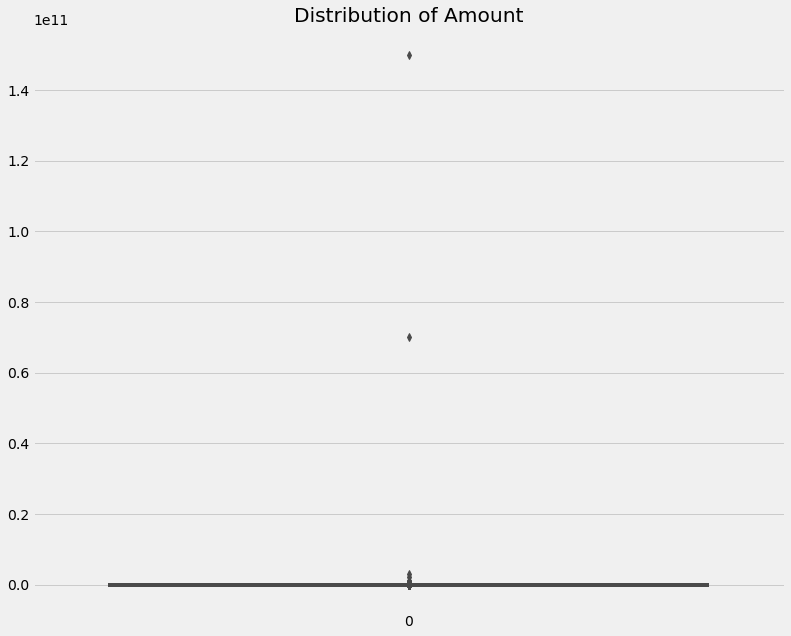

In [201]:
# Visualize on a graph
plt.figure(figsize=(12,10))
plt.title("Distribution of Amount")
plt.style.use("fivethirtyeight")
sns.boxplot(data = data["Amount($)"], palette="Blues_d")

Our data has outliers as seen in the graph above so the best averaging metric should be median.

In [190]:
data["Amount($)"].loc[582:]

582     26000000.0
583      5500000.0
584      6800000.0
585      6000000.0
586     36000000.0
           ...    
2872     3000000.0
2873    20000000.0
2874    55000000.0
2875    26000000.0
2876     8000000.0
Name: Amount($), Length: 2295, dtype: float64

In [155]:
data["Funding Year"].dtypes

dtype('O')

In [191]:
# Group Amount by year
Amount_by_Year = data.groupby("Funding Year")["Amount($)"].sum().reset_index()
Amount_by_Year

,Funding Year,Amount($)
0,2018,6.641773e+09
1,2019,3.336433e+09
2,2020,9.139562e+10
3,2021,1.798452e+11


<AxesSubplot:title={'center':'Trend Analysis'}, xlabel='Funding Year', ylabel='Amount($)'>

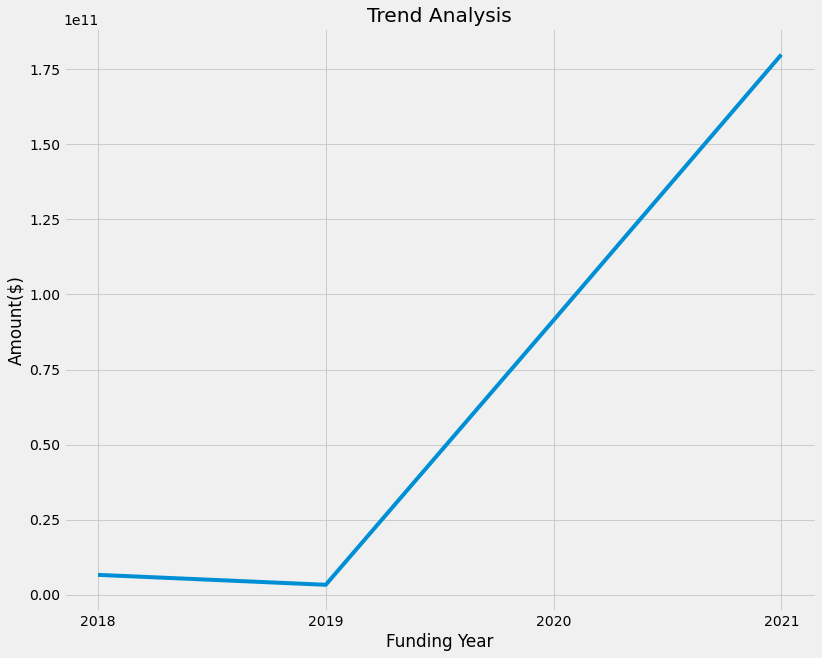

In [200]:
# Plot the result on a graph
plt.figure(figsize=(12,10))
plt.title("Trend Analysis")
plt.style.use("fivethirtyeight")
sns.lineplot(data=Amount_by_Year, x="Funding Year", y="Amount($)", markers=True)

 There is a trend in the data after 2019. This means that the amount invested increases each year after 2019. 

### - Deep dive on Sector

In [221]:
Sector = pd.DataFrame(data["Sector"].value_counts(pd.set_option("display.max_rows", None)))

In [222]:
Sector

,Sector
FinTech,175
EdTech,148
Financial Services,88
Fintech,85
Edtech,74
E-commerce,73
Automotive,54
AgriTech,43
Food & Beverages,39
Logistics,37


In [225]:
data.loc[1911:1911]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
1911,Fullife Healthcare,Primary Business is Development and Manufactur...,Series C,22000000.0,Pharmaceuticals\t#REF!,Varun Khanna,2021,2009,Morgan Stanley Private Equity Asia,NaN


In [227]:
data["Sector"].replace("Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.", "HealthCare", inplace = True, regex=True)
data.loc[1911:1911]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
1911,Fullife Healthcare,HealthCare,Series C,22000000.0,Pharmaceuticals\t#REF!,Varun Khanna,2021,2009,Morgan Stanley Private Equity Asia,NaN


In [228]:
data.loc[1925:1925]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
1925,MoEVing,MoEVing is India's only Electric Mobility focu...,Seed,5000000.0,Gurugram\t#REF!,"Vikash Mishra, Mragank Jain",2021,2021,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",NaN


In [230]:
data["Sector"].replace("MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.", "Technolgy", inplace = True, regex = True)
data.loc[1925:1925]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
1925,MoEVing,Technolgy,Seed,5000000.0,Gurugram\t#REF!,"Vikash Mishra, Mragank Jain",2021,2021,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",NaN


In [231]:
data.loc[2768:2768]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
2768,Sochcast,Sochcast is an Audio experiences company that ...,NaN,0.0,Online Media\t#REF!,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",2021,2020,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed


In [232]:
data["Sector"].replace("Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience", "Technolgy", inplace = True, regex = True)
data.loc[2768:2768]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
2768,Sochcast,Technolgy,NaN,0.0,Online Media\t#REF!,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",2021,2020,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed
